## DQA and Data Cleaning Transactions

In [18]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df_transaction = pd.read_excel('Raw_data.xlsx',sheet_name='Transactions')
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

* product_first_sold_date dtype has to be converted to datetime.

### 1. changing dtypes of variables

In [6]:
df_transaction['product_first_sold_date'] = pd.to_datetime(df_transaction['product_first_sold_date'])
df_transaction['product_first_sold_date'].head()

0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
Name: product_first_sold_date, dtype: datetime64[ns]

### 2. Checking and imputing missing values

In [7]:
df_transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [12]:
#imputing missing values with random sample imputation

def impute_nan(df,variable):
    """taking random sample from non-null values"""
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=42)
    """taking null value index"""
    random_sample.index = df[df[variable].isnull()].index
    """Replacing the null value with random sample"""
    df.loc[df[variable].isnull(),variable] = random_sample

In [15]:
impute_nan(df_transaction,'online_order')
impute_nan(df_transaction,'brand')
impute_nan(df_transaction,'product_line')
impute_nan(df_transaction,'product_class')
impute_nan(df_transaction,'product_size')
impute_nan(df_transaction,'standard_cost')
impute_nan(df_transaction,'product_first_sold_date')

df_transaction.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

* The missing values has been dealth with using **Random Sample Imputation**.

### 3. Checking for outliers.

<AxesSubplot:xlabel='standard_cost'>

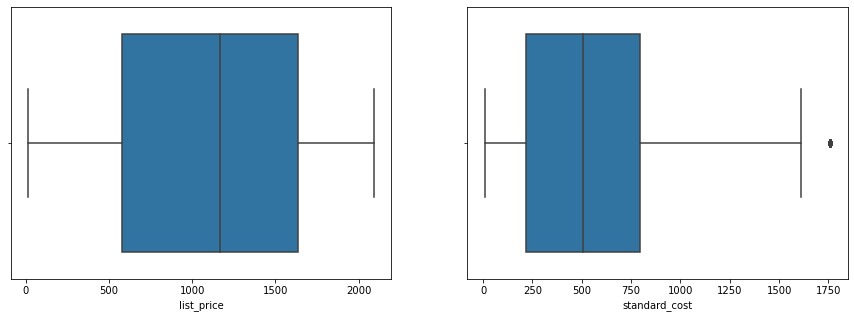

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(df_transaction['list_price'])

plt.subplot(1,2,2)
sns.boxplot(df_transaction['standard_cost'])

* There are some outliers in **standard_cost** can be ignored as some products can have higher cost.

### 4. Feature Engineering
* Creating new feature `profit` from `list_price` and `standard_cost`

In [22]:
df_transaction['Profit'] = df_transaction['list_price'] - df_transaction['standard_cost']
df_transaction['Profit'].head()

0      17.87
1    1702.55
2    1544.61
3     817.36
4    1055.82
Name: Profit, dtype: float64

(-200.0, 2000.0)

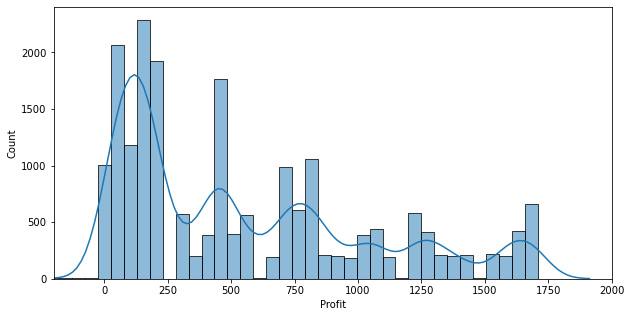

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df_transaction['Profit'],kde=True)
plt.xlim(-200,2000)

### 5. Checking inconsistency of data.

In [27]:
df_transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Profit'],
      dtype='object')

In [29]:
for i in ['online_order','order_status','brand','product_line','product_class','product_size']:
    print(i)
    print(df_transaction[i].value_counts(),"\n\n")

online_order
1.0    10019
0.0     9981
Name: online_order, dtype: int64 


order_status
Approved     19821
Cancelled      179
Name: order_status, dtype: int64 


brand
Solex             4304
Giant Bicycles    3354
WeareA2B          3324
OHM Cycles        3070
Trek Bicycles     3013
Norco Bicycles    2935
Name: brand, dtype: int64 


product_line
Standard    14325
Road         4003
Touring      1244
Mountain      428
Name: product_line, dtype: int64 


product_class
medium    13968
high       3042
low        2990
Name: product_class, dtype: int64 


product_size
medium    13122
large      4015
small      2863
Name: product_size, dtype: int64 




### 6. checking for duplicate values

* having duplicates in dataset will the data analysis.

In [31]:
df_transaction[df_transaction.duplicated()==True]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit


* There are no duplicates in dataset.
* since the data has been cleaned saving the data into csv file for further analysis.

In [32]:
df_transaction.to_csv("transactions_cleaned_csv",index=False)